## There are 13 attributes

- age: age in years
- sex: sex (1 = male; 0 = female)
- cp: chest pain type
-- Value 0: typical angina
-- Value 1: atypical angina
-- Value 2: non-anginal pain
-- Value 3: asymptomatic
- trestbps: resting blood pressure (in mm Hg on admission to the hospital)
- chol: serum cholestoral in mg/dl
- fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
- restecg: resting electrocardiographic results
-- Value 0: normal
-- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
-- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
- thalach: maximum heart rate achieved
- exang: exercise induced angina (1 = yes; 0 = no)
- oldpeak = ST depression induced by exercise relative to rest
- slope: the slope of the peak exercise ST segment
-- Value 0: upsloping
-- Value 1: flat
-- Value 2: downsloping
- ca: number of major vessels (0-3) colored by flourosopy
- thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
and the label
- condition: 0 = no disease, 1 = disease

## Import Library

In [69]:
# Regular EDA (Exploratory data analysis) and ploting libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, classification_report


In [70]:
df = pd.read_csv('heart_cleveland_upload.csv')

In [71]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [72]:
df['condition'].value_counts()[0]

160

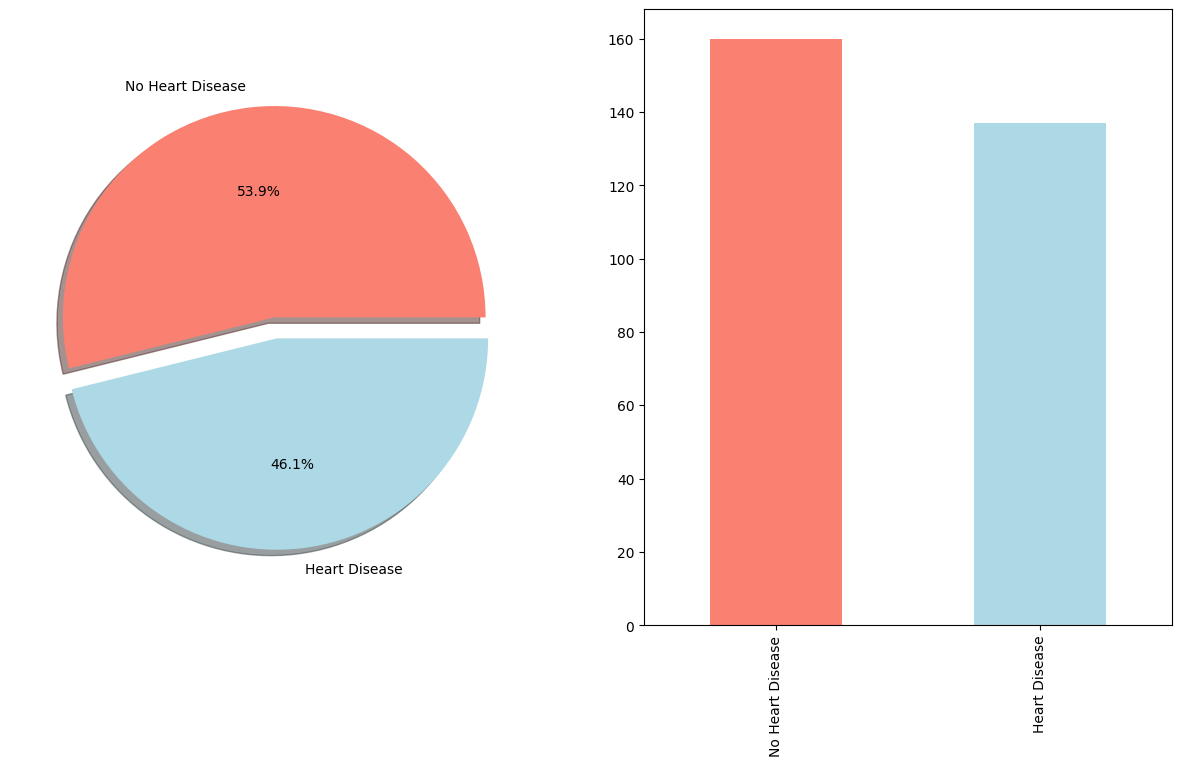

In [73]:
# Visualizing the Condition
f,ax=plt.subplots(1,2,figsize=(15,8))
df["condition"].replace({0:"No Heart Disease",1:"Heart Disease"}).value_counts().plot(kind="pie",colors=["salmon","lightblue"],ax=ax[0],explode=[0,0.1],autopct='%1.1f%%',shadow=True)
ax[0].set_ylabel('')
df["condition"].replace({0:"No Heart Disease",1:"Heart Disease"}).value_counts().plot(kind="bar", ax = ax[1],color=["salmon","lightblue"])
ax[1].set_ylabel('')
ax[1].set_xlabel('')
plt.show()

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


In [77]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


### Handle missing values by filling or deleting them
### Fill missing values with the average value

In [81]:
df.fillna(df.mean(), inplace=True)

### Delete rows that have missing values

In [82]:
df.dropna(inplace=True)

In [83]:
df.isna().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64

From above info about the data we understand that there are no missing values in data set, so no filling data step required.<br> 
And,<br>
All columns has datatype of int and float so no conversion is needed

## Split data attribute with label

In [84]:
X = df.drop(columns='condition', axis=1)
Y = df['condition']

In [85]:
print(X)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     69    1   0       160   234    1        2      131      0      0.1   
1     69    0   0       140   239    0        0      151      0      1.8   
2     66    0   0       150   226    0        0      114      0      2.6   
3     65    1   0       138   282    1        2      174      0      1.4   
4     64    1   0       110   211    0        2      144      1      1.8   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
292   40    1   3       152   223    0        0      181      0      0.0   
293   39    1   3       118   219    0        0      140      0      1.2   
294   35    1   3       120   198    0        0      130      1      1.6   
295   35    0   3       138   183    0        0      182      0      1.4   
296   35    1   3       126   282    0        2      156      1      0.0   

     slope  ca  thal  
0        1   1     0  
1        0   2     0  
2        2   0    

In [86]:
print(Y)

0      0
1      0
2      0
3      1
4      0
      ..
292    1
293    1
294    1
295    0
296    1
Name: condition, Length: 297, dtype: int64


## Split Data Training and Data Testing

In [87]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [88]:
print(X.shape, X_train.shape, X_test.shape)

(297, 13) (237, 13) (60, 13)


## Model Training

In [89]:
model = LogisticRegression(max_iter=1000)

In [90]:
model.fit(X_train, Y_train)


LogisticRegression(max_iter=1000)

## Model Evaluation

In [91]:
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [92]:
print('accuracy data training :', training_data_accuracy)

accuracy data training : 0.869198312236287


In [93]:
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [94]:
print('accuracy data testing :', test_data_accuracy)

accuracy data testing : 0.9


In [95]:
precision = precision_score(Y_test, X_test_prediction)
print('Precision score data testing:', precision)

Precision score data testing: 0.9230769230769231


In [96]:
# Confusion Matrix
conf_matrix = confusion_matrix(Y_test, X_test_prediction)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[30  2]
 [ 4 24]]


In [97]:
# Classification Report
class_report = classification_report(Y_test, X_test_prediction)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.94      0.91        32
           1       0.92      0.86      0.89        28

    accuracy                           0.90        60
   macro avg       0.90      0.90      0.90        60
weighted avg       0.90      0.90      0.90        60



## prediction model

In [98]:
input_data = (57, 1, 3, 140, 192, 0, 0, 148, 0, 0.4, 1, 0, 1)

input_data_as_numpy_array = np.asarray(input_data)

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]==0):
    print('patients does not have heart disease')
else:
    print('patients with heart disease')

[0]
patients does not have heart disease


c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [102]:
input_data = (54, 1, 1, 192, 283, 0, 2, 195, 0, 0, 0, 1, 2)

input_data_as_numpy_array = np.asarray(input_data)

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]==0):
    print('patients does not have heart disease')
else:
    print('patients with heart disease')

[1]
patients with heart disease


c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


## Save Model

In [103]:
import pickle

In [104]:
filename = 'coronaryheart_disease_final.sav'
pickle.dump(model, open(filename, 'wb'))